In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/relax_challenge/takehome_users.csv", encoding = "latin-1")

In [7]:
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [9]:
type(df['creation_time'][0])

str

In [10]:
df['creation_source'].value_counts().sort_values(ascending=False)

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

The least number of people have joined using google signups. Maximum number of people have joined with an organisational invite.

In [ ]:
df['opted_in_to_mailing_list'].value_counts()

0    9006
1    2994
Name: opted_in_to_mailing_list, dtype: int64

Three fourths of the people have not opted in to the mailing list. Relax need to investigate the reason why.

In [11]:
plt.rcParams['figure.figsize'] = 9,8

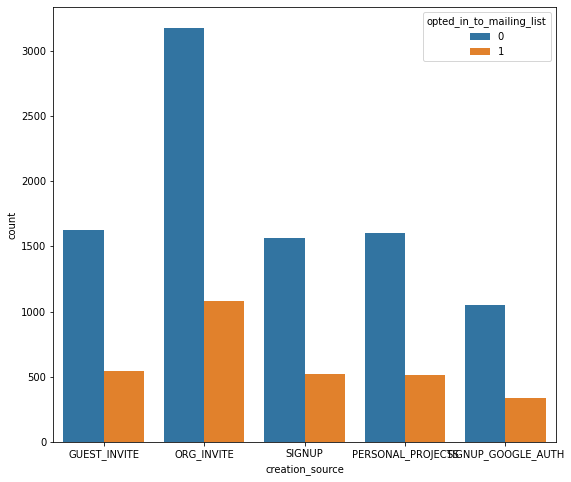

In [12]:
sns.countplot(df['creation_source'], hue=df['opted_in_to_mailing_list'])

In [ ]:
df['creation_source'].value_counts().sort_values(ascending=False)

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

In [ ]:
df.groupby('creation_source')['opted_in_to_mailing_list'].sum()

creation_source
GUEST_INVITE           541
ORG_INVITE            1078
PERSONAL_PROJECTS      512
SIGNUP                 525
SIGNUP_GOOGLE_AUTH     338
Name: opted_in_to_mailing_list, dtype: int64

In [ ]:
df.groupby('creation_source')['opted_in_to_mailing_list'].sum() / df['creation_source'].value_counts()

GUEST_INVITE          0.250116
ORG_INVITE            0.253409
PERSONAL_PROJECTS     0.242539
SIGNUP                0.251557
SIGNUP_GOOGLE_AUTH    0.244043
dtype: float64

Above, we have plotted the ratio of opting in to mailing list, by creation source. The ratio is more or less constant across creation source types.

In [13]:
from datetime import datetime

In [ ]:
times = df['creation_time'][0]
times

'2014-04-22 03:53:30'

In [ ]:
date_obj = datetime.strptime(times, '%Y-%m-%d %H:%M:%S')
print(date_obj.date())

2014-04-22


In [ ]:
date_time_str = '2018-06-29 08:15:27.243860'
date_time_obj = datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S.%f')

print('Date:', date_time_obj.date())
print('Time:', date_time_obj.time())
print('Date-time:', date_time_obj)

Date: 2018-06-29
Time: 08:15:27.243860
Date-time: 2018-06-29 08:15:27.243860


In [ ]:
now = datetime.now()
print(datetime.timestamp(now))

1598444385.707112


In [16]:
now = datetime.now()
print(datetime.timestamp(now))
print(now - datetime.fromtimestamp(df['last_session_creation_time'][0]))

1598460736.228448
2318 days, 12:58:46.228448


In [18]:
dfe = pd.read_csv("/content/drive/My Drive/Colab Notebooks/relax_challenge/takehome_user_engagement.csv")

In [19]:
df.head(3)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0


In [20]:
dfe.head(5)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [ ]:
dfe['visited'].value_counts()

1    207917
Name: visited, dtype: int64

In [144]:
dfm = pd.merge(df, dfe, left_on = 'object_id', right_on = 'user_id')

In [145]:
df.shape, dfe.shape, dfm.shape

((12000, 10), (207917, 3), (207917, 13))

In [24]:
dfm.head(3)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,user_id,visited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014-04-22 03:53:30,1,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-15 03:45:04,2,1
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-29 03:45:04,2,1


In [25]:
def make_timestamp(t):
    datetime_obj = datetime.strptime(t, '%Y-%m-%d %H:%M:%S')
    return datetime.timestamp(datetime_obj)

In [146]:
dfm['creation_timestamp'] = dfm['creation_time'].apply(make_timestamp)

In [147]:
dfm['login_time'] = dfm['time_stamp']
dfm = dfm.drop('time_stamp', axis=1)

In [148]:
dfm['login_timestamp'] = dfm['login_time'].apply(make_timestamp)

In [149]:
dfm.head(3)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,visited,creation_timestamp,login_time,login_timestamp
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1,1,1.398139e+09,2014-04-22 03:53:30,1.398139e+09
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2,1,1.384487e+09,2013-11-15 03:45:04,1.384487e+09
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2,1,1.384487e+09,2013-11-29 03:45:04,1.385697e+09


In [31]:
pd.set_option('display.max_rows', 200)

Let us drop those users who have logged in at most 2 times.

In [108]:
rare_users = dfm['user_id'].value_counts()[dfm['user_id'].value_counts() <= 2].index
rare_users =list(rare_users)

In [151]:
rare_users

[2377,
 5029,
 7753,
 6969,
 10943,
 2747,
 3272,
 4099,
 7175,
 7861,
 7625,
 6678,
 6161,
 10962,
 6996,
 6603,
 10922,
 7085,
 7585,
 4810,
 1610,
 9522,
 10146,
 6085,
 10496,
 4153,
 822,
 1301,
 6200,
 10179,
 128,
 7952,
 2760,
 8641,
 10279,
 2630,
 10078,
 8618,
 5894,
 9165,
 9662,
 8881,
 10407,
 5300,
 6548,
 2198,
 11947,
 7207,
 11667,
 9052,
 2450,
 5178,
 771,
 2722,
 9308,
 675,
 1571,
 1591,
 8637,
 2136,
 789,
 10758,
 4539,
 2434,
 4500,
 10154,
 3800,
 5168,
 9820,
 2118,
 5760,
 3033,
 2603,
 6458,
 19,
 5635,
 5717,
 4152,
 682,
 6985,
 3619,
 7824,
 10658,
 10000,
 2137,
 6857,
 1079,
 11084,
 9622,
 6746,
 6950,
 11921,
 291,
 3331,
 5504,
 7424,
 7877,
 3153,
 5539,
 11211,
 5919,
 7838,
 7438,
 6450,
 7582,
 338,
 8969,
 10925,
 11016,
 11595,
 7876,
 9802,
 413,
 9930,
 922,
 7822,
 4892,
 973,
 6079,
 4815,
 8250,
 5174,
 10395,
 777,
 11464,
 7690,
 11020,
 7834,
 1949,
 5046,
 1933,
 3027,
 6583,
 11963,
 3903,
 667,
 4307,
 9240,
 683,
 1855,
 3921,
 411

In [152]:
dfm['user_id'].value_counts()  # 8823

3623     606
906      600
1811     593
7590     590
8068     585
        ... 
6763       1
3773       1
5822       1
10040      1
2047       1
Name: user_id, Length: 8823, dtype: int64

In [43]:
rare_users = pd.Series(rare_users)
rare_users.value_counts()

2047    1
3515    1
1442    1
3491    1
9638    1
       ..
8977    1
789     1
8985    1
2844    1
6147    1
Length: 6575, dtype: int64

In [150]:
dfme = dfm.copy()

In [112]:
dfm['user_id'].nunique()

8823

In [40]:
def bool_rare(item):
  if item in rare_users:
    return False
  else:
    return True

In [41]:
rows_to_drop = dfm['user_id'].apply(bool_rare)

In [153]:
print(type(rows_to_drop))
rows_to_drop

<class 'pandas.core.series.Series'>


0         False
1          True
2          True
3          True
4          True
          ...  
207912    False
207913    False
207914    False
207915    False
207916    False
Name: user_id, Length: 207917, dtype: bool

In [154]:
dfm = dfm.loc[rows_to_drop]

In [53]:
dfm.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,visited,creation_timestamp,login_time,login_timestamp
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2,1,1.384487e+09,2013-11-15 03:45:04,1.384487e+09
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2,1,1.384487e+09,2013-11-29 03:45:04,1.385697e+09
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2,1,1.384487e+09,2013-12-09 03:45:04,1.386561e+09
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2,1,1.384487e+09,2013-12-25 03:45:04,1.387943e+09
5,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2,1,1.384487e+09,2013-12-31 03:45:04,1.388462e+09


In [155]:
dfm.columns, dfm.shape

(Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
        'last_session_creation_time', 'opted_in_to_mailing_list',
        'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id', 'user_id',
        'visited', 'creation_timestamp', 'login_time', 'login_timestamp'],
       dtype='object'), (201002, 15))

In [61]:
dfm.iloc[1, 14]

1385696704.0

Now we have dropped the users who have logged in less than 3 times.

In [156]:
dfm = dfm.sort_values(by=['user_id','login_timestamp'])

In [117]:
adopted = {}

In [118]:
dfm.shape

(201002, 15)

In [119]:
for i in range(dfm.shape[0] - 2):
  uid = dfm.iloc[i, 10]    # getting the user ID value in row 'i'
  time1 = dfm.iloc[i, 14]
  if (dfm.iloc[i + 2, 10]) == uid:
    time2 = dfm.iloc[i + 1, 14]
    time3 = dfm.iloc[i + 2, 14]
    if ((time3 - time1) < 604800) and ((time3 - time1) > 86400):
      adopted[uid] = 1

# 86400 seconds in a day
# 604800 seconds in a week

In [121]:
dfmc = dfm.copy()

In [157]:
dfa = pd.DataFrame({'adopted': list(adopted.values())}, index=list(adopted.keys()))
dfa

,adopted
user_id,
2,1
10,1
20,1
33,1
42,1
...,...
11965,1
11967,1
11969,1


In [141]:
dfa.index.name = 'user_id'
dfa

,adopted
user_id,
2,1
10,1
20,1
33,1
42,1
...,...
11965,1
11967,1
11969,1


In [122]:
dfm = pd.merge(dfm, dfa, on = 'user_id')

In [129]:
dfm.tail(4)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,visited,creation_timestamp,login_time,login_timestamp,adopted
197914,11988,2014-03-15 11:04:47,Minick John,JohnFMinick@yahoo.com,PERSONAL_PROJECTS,1.401621e+09,0,0,114,NaN,11988,1,1.394881e+09,2014-05-24 11:04:47,1.400929e+09,1
197915,11988,2014-03-15 11:04:47,Minick John,JohnFMinick@yahoo.com,PERSONAL_PROJECTS,1.401621e+09,0,0,114,NaN,11988,1,1.394881e+09,2014-05-26 11:04:47,1.401102e+09,1
197916,11988,2014-03-15 11:04:47,Minick John,JohnFMinick@yahoo.com,PERSONAL_PROJECTS,1.401621e+09,0,0,114,NaN,11988,1,1.394881e+09,2014-05-27 11:04:47,1.401189e+09,1
197917,11988,2014-03-15 11:04:47,Minick John,JohnFMinick@yahoo.com,PERSONAL_PROJECTS,1.401621e+09,0,0,114,NaN,11988,1,1.394881e+09,2014-06-01 11:04:47,1.401621e+09,1


In [127]:
dfm['adopted'].value_counts(), dfm.shape

(1    197918
 Name: adopted, dtype: int64, (197918, 16))

In [142]:
dfme.shape

(197918, 16)

In [130]:
dfme = pd.merge(dfme, dfa, on = 'user_id')

In [131]:
dfme.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,visited,creation_timestamp,login_time,login_timestamp,adopted
0,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2,1,1.384487e+09,2013-11-15 03:45:04,1.384487e+09,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2,1,1.384487e+09,2013-11-29 03:45:04,1.385697e+09,1
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2,1,1.384487e+09,2013-12-09 03:45:04,1.386561e+09,1
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2,1,1.384487e+09,2013-12-25 03:45:04,1.387943e+09,1
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2,1,1.384487e+09,2013-12-31 03:45:04,1.388462e+09,1


In [134]:
dfme['adopted'] = dfme['adopted'].fillna(0)

In [136]:
dfme.shape

(197918, 16)

In [135]:
dfme['adopted'].value_counts()

1    197918
Name: adopted, dtype: int64

In [158]:
# joining

dfj = dfme.join(dfa, on='user_id', rsuffix = '_adopted')
dfj.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,visited,creation_timestamp,login_time,login_timestamp,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1,1,1.398139e+09,2014-04-22 03:53:30,1.398139e+09,NaN
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2,1,1.384487e+09,2013-11-15 03:45:04,1.384487e+09,1.0
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2,1,1.384487e+09,2013-11-29 03:45:04,1.385697e+09,1.0
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2,1,1.384487e+09,2013-12-09 03:45:04,1.386561e+09,1.0
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2,1,1.384487e+09,2013-12-25 03:45:04,1.387943e+09,1.0


In [159]:
dfj['adopted'] = dfj['adopted'].fillna(0)
dfj.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,visited,creation_timestamp,login_time,login_timestamp,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1,1,1.398139e+09,2014-04-22 03:53:30,1.398139e+09,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2,1,1.384487e+09,2013-11-15 03:45:04,1.384487e+09,1.0
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2,1,1.384487e+09,2013-11-29 03:45:04,1.385697e+09,1.0
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2,1,1.384487e+09,2013-12-09 03:45:04,1.386561e+09,1.0
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2,1,1.384487e+09,2013-12-25 03:45:04,1.387943e+09,1.0


In [160]:
dfj['adopted'].value_counts()

1.0    197918
0.0      9999
Name: adopted, dtype: int64

Now we have the full dataframe with 'adopted' column as desired.

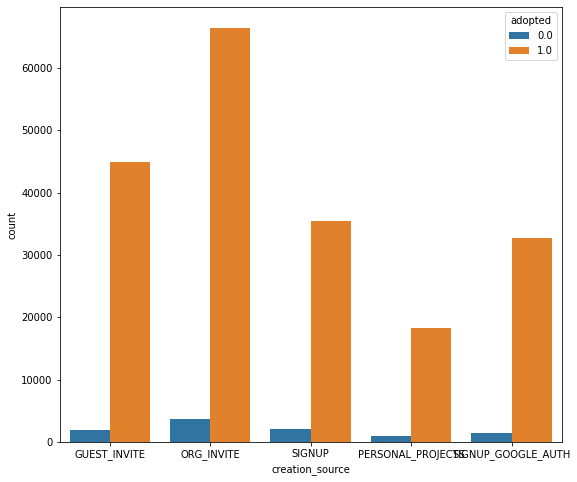

In [161]:
sns.countplot(dfj['creation_source'], hue=dfj['adopted'])

Let us see how adoption varies by creation_source

In [164]:
adoption_creation = dfj.groupby('creation_source')['adopted'].sum() / dfj['creation_source'].value_counts()
adoption_creation

GUEST_INVITE          0.960509
ORG_INVITE            0.947739
PERSONAL_PROJECTS     0.954011
SIGNUP                0.944440
SIGNUP_GOOGLE_AUTH    0.955696
dtype: float64

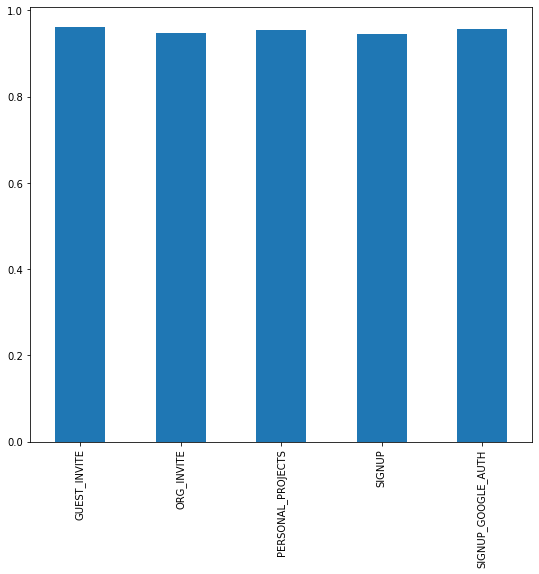

In [167]:
adoption_creation.plot(kind='bar')

In [173]:
diff = dfj[dfj['adopted'] == 0]['creation_timestamp'].mean() - dfj[dfj['adopted'] == 1]['creation_timestamp'].mean()
diff / 86400

210.35517088410202

It seems users who have not adopted, have joined on an average 210 days later than those ho adopted.

86400 seconds in a day

604800 seconds in a week